# DATA 1 Formative Exam

Simos Gerasimou


### **Time Allowed:**
Twenty-Four (24) hours

### **Allocation of Marks:**
The exam consists of four (4) questions and each question is worth 25 marks.

### **Instructions:**
Candidates should answer all questions using Jupyter Notebooks running Python 3. Failing to do so will result in a mark of 0%. All questions are independent and can be answered in any order. Specific questions have strict limits on the length of your answers; text exceeding the limit will not be marked.

***

In [1]:
#Preamble: Add main Python libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

### **Question 1: Data Analysis (25 marks)**

YorkBus, as the name suggests, is a bus company operating in Noth Yorkshire. Given the increasing fuel prices and the uncertainty in income due to the CoronaVirus, the company is interested in analysing, among others, the expenses it would incur if all services continue running normally. To do this analysis, YorkBus asked DataVision to help. 

You should load the dataset named "yorkBus.csv" and answer the following data questions using Python 3, Pandas and Matplotlib.


**(i) [2 marks]** Which is the independent and which is the dependent variable?

In [2]:
#### Independent: miles
#### Dependent: cost

In [27]:
import pandas as pd
busDF = pd.read_csv("yorkBus.csv")
busDF.head(2)

,Period,Cost,Miles
0,1,21390,314700
1,2,21260,316000


**(ii) [4 marks]** Calculate the Pearson correlation coefficient. You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy or numpy method to check your result.

In [28]:
import numpy as np
import scipy.stats as stats

#Analytical method
X = (busDF["Miles"]-np.mean(busDF["Miles"])) 
Y = (busDF["Cost"]-np.mean(busDF["Cost"]))
r1 = np.sum(X*Y)/(busDF.shape[0]-1)/np.std(busDF["Miles"], ddof=1)/np.std(busDF["Cost"], ddof=1)

#Method 2
r2=stats.pearsonr(busDF["Miles"], busDF["Cost"])

#Method 3
r3=np.corrcoef(busDF["Miles"], busDF["Cost"])

print("R(Method 1):", r1)
print("R(Method 2):", r2[0])
print("R(Method 3):", r3[0][1])

R(Method 1): 0.9728495502470614
R(Method 2): 0.9728495502470615
R(Method 3): 0.9728495502470612


**(iii) [2 marks]**
What do you think of the correlation between these two variables? What do you expect the linear regression model to be?

In [29]:
# There is a strong positive correlation between these variables. 
# The linear regression model should fit this data well.

**(iv) [3 marks]**
Using Python and scikit-learn, train a simple linear regression model for this data

In [31]:
from sklearn import linear_model

#All below are equivalent and transform busDF['Miles'] into the format (2D array) 
#expected by the linear regression model. This would not be needed if we have more than one independent variables
# busDFX = pd.DataFrame(busDF['Miles'])
# busDFX = np.array(busDF['Miles']).reshape(-1,1)
# busDFX = busDF['Miles'].to_numpy().reshape(-1,1)
busDFX = [[x] for x in busDF['Miles']]

busDFY = busDF['Cost']

busLR = linear_model.LinearRegression()
busLR.fit(busDFX, busDFY)

LinearRegression()

**(v) [3 marks]**
Report the regression and intercept coefficients of this linear regression model. Report also the final form of the linear regression equation

In [32]:
print("α:", busLR.intercept_)
print("β:", busLR.coef_)
print("Cost = %.3f + %.3f * Mile" % (busLR.intercept_, busLR.coef_))

α: 6496.3277278758
β: [0.04467296]
Cost = 6496.328 + 0.045 * Mile


**(vi) [4 marks]**
Calculate the goodness of fit  𝑅2 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate sklearn method to check your result.

In [33]:
from sklearn.metrics import r2_score

busPredict = busLR.predict(busDFX)#pd.DataFrame(nutritionDF["KnowledgeScore"]))#np.arange(min,max).reshape(-1,1))

#Analytically
ssT = [ ((busDF["Cost"][i]-np.mean(busDF["Cost"]))**2) for i in range(0, len(busDF["Cost"]))]
ssR = [ ((busDF["Cost"][i]-busPredict[i])**2)           for i in range(0, len(busDF["Cost"]))]
ssM = [ ((busPredict[i]-np.mean(busDF["Cost"]))**2)     for i in range(0, len(busDF["Cost"]))]

print ("R2 (method A):", np.sum(ssM)/np.sum(ssT))
print ("R2 (method B):", 1 - np.sum(ssR)/np.sum(ssT))

print('R2 (sklearn ):', r2_score(busDF["Cost"], busPredict))

R2 (method A): 0.9464362474159096
R2 (method B): 0.9464362474159097
R2 (sklearn ): 0.9464362474159097


**(vii) [5 marks]**
Plot a scatter plot and the linear regression model. Does the plot confirm the results obtained in the previous questions? 

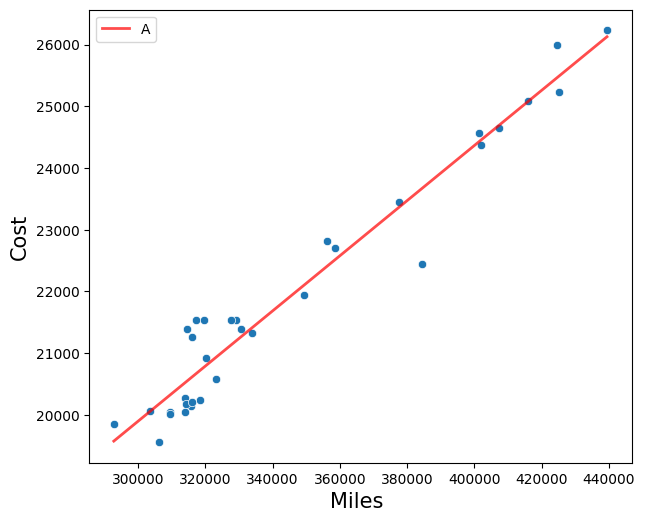

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(7,6), dpi=100)
ax = sns.scatterplot(x="Miles", y="Cost", data=busDF, marker='o')
ax.set_xlabel('Miles ',fontsize=15) # set x label
ax.set_ylabel('Cost',fontsize=15,rotation=90) # set y label


#Note: the code below support all methods used to construct busDFX in (iv)
#      only one is needed here depending on the method use in (iv)
if (isinstance(busDFX, np.ndarray)) or (isinstance(busDFX, list)):
    min = np.min(busDFX)
    max = np.max(busDFX)
elif (isinstance(busDFX, pd.DataFrame)):
    min = np.min(busDFX["Miles"])
    max = np.max(busDFX["Miles"])

busPredict = busLR.predict(np.arange(min,max).reshape(-1,1))
ax = sns.lineplot(y=busPredict.flatten(), x=np.arange(min, max), linestyle='-', color="r", label="A", alpha=0.7, lw=2)

**(viii) [2 marks]**
Calculate the approximate cost of a bus that has travelled 375000 miles over a single period

In [35]:
milesX = np.array([[375000]])

C = 6496.327 + 0.044673 * milesX[0][0]
print("Cost:", C)

print("Cost (confirmation):", busLR.predict(milesX))

Cost: 23248.702
Cost (confirmation): [23248.68719429]


---

### **Question 2: Data Processing (25 marks)**

Netflix is a media-services provider and production company. The company's primary business is its subscription-based streaming service which offers online streaming of a library of films and television programs, including those produced in-house.

DataVision has been recruited to analyse the data about TV shows and movies available on Netflix.


You should use the dataset named "netflix.csv" and answer the following data questions using Python 3, Pandas and Matplotlib.

**(i) [2 marks]**
What is the shape of the dataset?

In [36]:
netflixDF = pd.read_csv("netflix.csv")
print("Shape: ", netflixDF.shape)
netflixDF.head(2)

Shape:  (6234, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


**(ii) [3 marks]**
What does each column means and which is its datatype?

In [37]:
# * show_id (Numerical - discrete): unique show ID
# * type (categorical - nominal): show (content) type (TV show or movie)
# * title (Text): show title
# * director (Text): show director
# * cast (Text): list of actors in the show
# * country (Categorical - nominal): list of countries where the show was produced
# * data_added (Date): date added on Netflix
# * release_year (Numerical - discrete): release year of the show
# * rating (Categorical - ordinal): TV rating of the show (TV parental guidelines)
# * duration (Text): total show duration in minutes (or number of seasons)
# * listed_in (Categorical - nominal): genres of the show
# * description (Text): brief sumarry of the show 

In [38]:
netflixDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


**(iii) [2 marks]**
Is there any missing data? Show the number of missing data per column.

In [39]:
# Get the missing data and sort it in ascending order
missingDataSummary    = netflixDF.isna().sum().sort_values(ascending=False)
# Calculate the percentage of missing data
missingDataPercentage = (netflixDF.isnull().sum()/netflixDF.isnull().count()).sort_values(ascending=False)
# Concatenate the two Series
missingData = pd.concat([missingDataSummary, missingDataPercentage], axis=1, keys=['Missing', 'Percentage'])
missingData

,Missing,Percentage
director,1969,0.315849
cast,570,0.091434
country,476,0.076355
date_added,11,0.001765
rating,10,0.001604
description,0,0.000000
listed_in,0,0.000000
duration,0,0.000000
release_year,0,0.000000
title,0,0.000000


**(iv) [3 marks]**
DataVision's policy is to remove any column of which more than 5% of the data is missing. Remove the appropriate columns. 

In [40]:
#We need to remove the columns director, cast, country
nfClean = netflixDF.drop(columns=['director', 'cast', 'country'])
nfClean.isna().sum().sort_values(ascending=False)

date_added      11
rating          10
description      0
listed_in        0
duration         0
release_year     0
title            0
type             0
show_id          0
dtype: int64

**(v) [4 marks]**
For the remaining columns with missing data, apply the most appropriate imputation method to eliminate the missing data

In [41]:
#Both for rating and date_added we can use the mode to impute the missing data
nfClean['date_added'] = nfClean['date_added'].fillna(nfClean['date_added'].mode()[0])
nfClean['rating'] = nfClean['rating'].fillna(nfClean['rating'].mode()[0])
nfClean.isna().sum().sort_values(ascending=False)

description     0
listed_in       0
duration        0
rating          0
release_year    0
date_added      0
title           0
type            0
show_id         0
dtype: int64

**(vi) [3 marks]**
What is the ratio between the different types of content available on Netflix? Plot a bar chart to illustrate this.

Text(0, 0.5, 'Number')

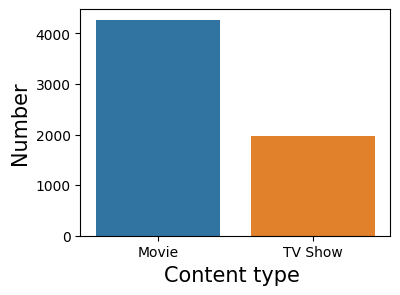

In [44]:
#Using seaborn
plt.subplots(figsize=(4,3), dpi=100)
ax = sns.countplot(data=nfClean, x='type')
ax.set_xlabel('Content type ',fontsize=15) # set x label
ax.set_ylabel('Number',fontsize=15,rotation=90) # set y label

**(vii) [4 marks]**
Plot a density graph that shows the distribution of content added per year. What do you infer from this plot?

The distribution is left skewed showing that the majority of content on Netflix has been released within the last 15 years.


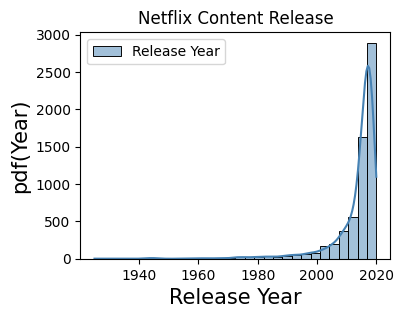

In [59]:
plt.subplots(figsize=(4,3), dpi=100)

#This will be deprecated 
# ax = sns.distplot(nfClean["release_year"], color="blue", label="Release Year", hist=True, kde_kws={"shade": True})
g = sns.histplot(nfClean, x='release_year', kde=True, color='steelblue', bins=30, label="Release Year")

g.set_title('Netflix Content Release')
g.set_xlabel('Release Year',fontsize=15) # set x label
g.set_ylabel('pdf(Year)',fontsize=15,rotation=90) # set y label
g.legend()

print("The distribution is left skewed showing that the majority of content on Netflix has been released within the last 15 years.")

**(viii) [4 marks]**
Find the 10 oldest tv shows on Netflix.

In [61]:
nfOldest = nfClean.sort_values("release_year", ascending = True)
nfOldest [nfOldest['type']=="TV Show"][:10]

,show_id,type,title,date_added,release_year,rating,duration,listed_in,description
4292,81030762,TV Show,Pioneers: First Women Filmmakers*,"December 30, 2018",1925,TV-PG,1 Season,TV Shows,This collection restores films from women who ...
4079,80161851,TV Show,Pioneers of African-American Cinema,"February 1, 2017",1946,TV-14,1 Season,TV Shows,This newly preserved collection features more ...
5981,70172488,TV Show,The Twilight Zone (Original Series),"July 1, 2017",1963,TV-PG,4 Seasons,"Classic & Cult TV, TV Sci-Fi & Fantasy","Hosted by creator Rod Serling, this groundbrea..."
5980,70155574,TV Show,The Andy Griffith Show,"July 1, 2017",1967,TV-G,8 Seasons,"Classic & Cult TV, TV Comedies",Homespun humor and easygoing Sheriff Andy Tayl...
5704,70136140,TV Show,Star Trek,"October 1, 2017",1968,TV-PG,3 Seasons,"Classic & Cult TV, TV Action & Adventure, TV S...","Led by unflappable Capt. Kirk, the crew of the..."
614,80236357,TV Show,Monty Python's Fliegender Zirkus,"October 2, 2018",1972,TV-14,1 Season,"International TV Shows, TV Comedies",The Pythons elevate the absurd to new heights ...
5669,70213238,TV Show,Monty Python's Flying Circus,"October 2, 2018",1974,NR,4 Seasons,"British TV Shows, Classic & Cult TV, Internati...",The Monty Python players make their mark with ...
5830,80244567,TV Show,Dad's Army,"March 31, 2018",1977,TV-PG,10 Seasons,"British TV Shows, Classic & Cult TV, TV Comedies",This beloved sitcom follows the unlikely heroe...
4273,70205634,TV Show,El Chavo,"December 31, 2017",1979,TV-PG,1 Season,"Classic & Cult TV, Kids' TV, Spanish-Language ...","El Chavo is a poor, nameless orphan who lives ..."
4369,80153226,TV Show,Ninja Hattori,"December 23, 2018",1981,TV-Y7,1 Season,"Anime Series, Kids' TV",Elementary school student Kenichi Mitsuba's ho...


---

### **Question 3: Inferential Analysis (25 marks)**

**Part A** 

York City Knights, York's professional rugby league club, wants to assess whether a new diet the team has been using helped rugby players to increase their muscle size. DataVision has collected data for 20 rugby players before and after using the diet.

You should use the dataset named "rugby.csv"and answer the following data questions using Python 3, Pandas and Matplotlib.


**(i) [3 marks]**
State the Null and Alternative hypotheses, reporting the variables that will be used for evaluating the hypotheses

In [62]:
# x_b: muscle size before
# x_a: muscle size after
#H0: x_b = x_a
#H1: x_b != x_a

**(ii) [2 marks]**
Calculate the degrees of freedom

In [63]:
sportDF = pd.read_csv("rugby.csv")
dof = sportDF.shape[0]-1

print("DoF:", dof)
sportDF.head(2)


DoF: 19


,ID,Pre,Post
0,1,18,22
1,2,21,25


**(iii) [3 marks]**
Find the critical value for a two-tailed test with significance level α=0.05

In [64]:
alpha = 0.05
negativeCriticalValue = stats.t.ppf(alpha/2, dof)
positiveCriticalValue = stats.t.ppf(1-alpha/2, dof)
print("Negative side critical value:", negativeCriticalValue)
print("Positive side critical value:", positiveCriticalValue)
print("As expected, the critical values both for negative and positive sides are the same (with different sign)!")

Negative side critical value: -2.0930240544082634
Positive side critical value: 2.093024054408263
As expected, the critical values both for negative and positive sides are the same (with different sign)!


**(iv) [4 marks]**
Perform the appropriate t test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy method to check your results.

In [67]:
sportDF["Diff"] = sportDF["Post"] - sportDF["Pre"]

#Analytically
sportDiffStd = np.std(sportDF["Diff"], ddof=1)

tStat = np.mean(sportDF["Diff"])/(sportDiffStd/np.sqrt(20))
print("t (Analyical):", tStat)

#Using Scipy stats
tStat2, pValue = stats.ttest_rel(sportDF["Post"], sportDF["Pre"])
print ("t (Scipy):", tStat2)

#Checking H0: #We can reject H0, the new diet contributes to muscle building
print ("We can reject H0 because: \
abs(t stat)>t critical, i.e., abs({:.3f})>({:.3f})".format(tStat, positiveCriticalValue))

t (Analyical): 3.2312526655803127
t (Scipy): 3.231252665580312
We can reject H0 because: abs(t stat)>t critical, i.e., abs(3.231)>(2.093)


**Part B**

FoxWood Inc. makes Apple Pencils for iPad and is interested in increasing the strength of their product. It is thought that strength is a function of metal concentration in the core of the pencil. An investigation is carried out to compare four levels of metal concentration: 5%, 10%, 15% and 20%. For each concentration level, six samples are collected and are measured based on their strength.

You should use the dataset named "pencil.csv" and answer the following data questions using Python 3, Pandas and Matplotlib.

**(v) [5 marks]**
Plot a boxplot for the different levels of metal concentration

In [24]:
appleDF = pd.read_csv("pencil.csv")
appleDF.head()

,Level,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6
0,0.05,7,8,15,11,9,10
1,0.10,12,17,13,18,19,15
2,0.15,14,18,19,17,16,18
3,0.20,19,25,22,23,18,20


Text(0, 0.5, 'Strength value')

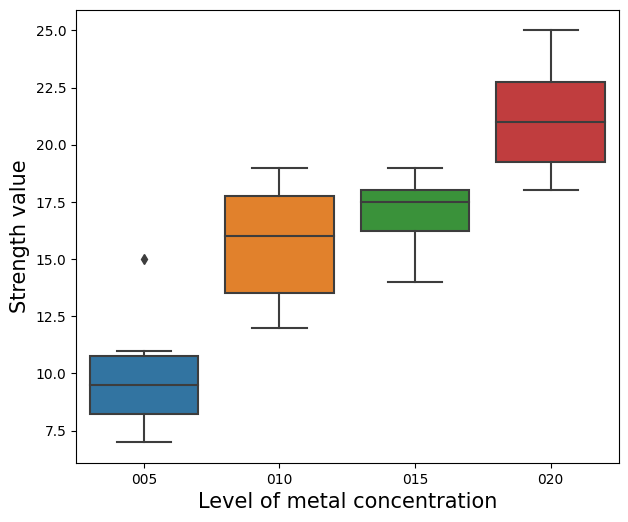

In [68]:
apple005 = appleDF.loc[0][1:]
apple010 = appleDF.loc[1][1:]
apple015 = appleDF.loc[2][1:]
apple020 = appleDF.loc[3][1:]

appleData = pd.DataFrame(data={"005":apple005, "010":apple010, "015":apple015, "020":apple020})
plt.subplots(figsize=(7,6), dpi=100)
ax = sns.boxplot(data=appleData)

ax.set_xlabel('Level of metal concentration',fontsize=15) # set x label
ax.set_ylabel('Strength value',fontsize=15,rotation=90) # set y label

**(vi) [3 marks]**
State the Null and Alternative hypotheses that will enable the company to check whether there is any difference in strength depending on the levels of metal concrentation


**$H_0$**: There is **no statistically significant difference** in pencil strength between different levels of metal concentration

$H_0: \overline{X}_{0.05} = \overline{X}_{0.10} = \overline{X}_{0.15} = \overline{X}_{0.20}$

**$H_1$**: There is **statistically significant difference** in pencil strength between different levels of metal concentration

$H_1: \exists i,j \in \{0.05, 0.10, 0.15, 0.20\} \bullet (i \neq j) \land (\overline{X}_{i} \neq \overline{X}_{j})$


**(vii) [5 marks]**
Perform the appropriate test to evaluate the hypotheses for significance level 𝛼=0.05 . You must show your calculations, i.e., calculate the result analytically, but you may use the appropriate scipy method to check your results.

In [69]:
X_G = [np.mean(apple005), np.mean(apple010), np.mean(apple015), np.mean(apple020)]
X_N = np.mean(X_G)

SS_M = 0; SS_R = 0; SS_T=0

SS_M += len(apple005) * np.power(np.mean(apple005) - X_N,2)
SS_M += len(apple010) * np.power(np.mean(apple010) - X_N,2)
SS_M += len(apple015) * np.power(np.mean(apple015) - X_N,2)
SS_M += len(apple020) * np.power(np.mean(apple020) - X_N,2)

SS_R += (len(apple005)-1) * np.var(apple005, ddof=1)
SS_R += (len(apple010)-1) * np.var(apple010, ddof=1)
SS_R += (len(apple015)-1) * np.var(apple015, ddof=1)
SS_R += (len(apple020)-1) * np.var(apple020, ddof=1)
                                              
df_M = 3     #4-1 
df_R = np.count_nonzero([apple005, apple010, apple015, apple020])-4   #24-4 

F1 = (SS_M/df_M)/(SS_R/df_R)

# #Using Scipy library
F2 = stats.f_oneway(apple005, apple010, apple015, apple020)

print("F (Analytically): ", F1)
print("F (Scipy):",         F2)


#Get F critical values
fCritical = stats.f.ppf(0.05, df_M, df_R)

#Checking H0: #We can reject H0, the level of metal concentration affes the pencils' strength
print ("We can reject H0 because: \
F>f critical, i.e., abs({:.3f})>({:.3f})".format(F1, fCritical))

F (Analytically):  19.605206999573202
F (Scipy): F_onewayResult(statistic=19.605206999573184, pvalue=3.5925782584743027e-06)
We can reject H0 because: F>f critical, i.e., abs(19.605)>(0.115)


***

### **Question 4: Data Science Process (25 marks)**

DataVision has recently been acquired by Alphabet Inc. This acquisition led to expanding the technical teams of DataVision and having several job openings for data scientist and software engineering positions. Given its expertise in data science, DataVision considers to develop a Virtual Assistant that helps its human resources team in making a more cohesive and consistent analysis of job applications.

**(i) [20 marks]** 
Using **no more than two sentences** for each data science lifecycle step, describe how you would implement this project to support the development of the Virtual Assistant of DataVision. You can use examples, fictional data or plots to explain your arguments.

**(ii) [5 marks]** Considering the sensitive information associated with developing such a Virtual Assistant, provide details of **two** ethical challenges that must be addressed and are also aligned with the guidelines for ethical data science or trustworthy AI. Use no more than **two** sentences per ethical challenge.



##### Note: these are some indicative answers. 

### Part i: Data Science Lifecycle

#### Identify Question: 
* The main question is how to determine which job applications are most likely to become valuable assets for DataVision
* A primary consideration is to detetermine the set of tasks and key areas that could increase the efficiency of the human resources (HR) if undertaken by a Virtual Assistant
* This information would help to establish what knowledge is required so that the Virtual Assistant can rank several job applications and enable to determine which types of raw data should be collected
* All these tasks can be achieved by conducting interviews with the HR team
* Success measures involve reducing the time and effort required for processing job applications
* All this information and questions form a specification for developing the data science project and producing a Virtual Assistant for the HR team


#### Collect Raw Data
* Having established the set of data needed for the Virtual Assistant, in this step we need to collect this data from existing job applications! 
* To achieve this, we need to identify the data sources (e.g., databases) in which existing data is stored and establish several characteristics about the data sources (e.g., how accurate they are) 
* These ddata sources might not belong only to DataVision but also to other companies owned by Alphabet Inc that have data scientists in their team
* Also, we need to develop (ideally automated) procedures to retrieve this data from the data sources in a robust and reliable manner 
* Examples of data that can be collected include: education (degrees), previous experience, programming languages known, portfolio of data science/software engineering projects etc. An interesting data item to be collected if the job application has a deadline is the time that the application has been submitted. This could provide useful insight regarding the ability of an applicant to meet strict deadlines.


#### Process Data
* We (typically) need to put data into appropriately formatted dataframes and give each column a consistent name (e.g., ID, Name, Previous Experience, Email)
* If data have come from different data sources (e.g., data bases) there might be a need to homogenise the data. This might include transforming data types in the same format, clean columns that have consistently reduntant information (e.g., the "minutes" from the duration column in the Netflix dataset can be removed) or merging columns that have the same information
* We also need to clean further the collected data by removing columns that are not needed and could lead to generating a biased Virtual Assistant. Such columns include (Name, Email, Gender etc). 
* We can further apply a strategy to impute missing values or detele columns (variables) in which more than 5% or 10% data is missing. 


#### Explore Data
* Compute descriptive statistics (measures of central tendency and dispersion) and determine a set of effective visualisation artifacts for the collected data. Using this information, identify patterns in data and explore what can be learnt from these patterns. For instance, this might include the average age of applicants or the standard deviation of years of experience the applicants have had before making an application to the company. All these information should be correlated with the outcome of each job application, whether it has been successful or not.
* Using again descriptive statistics and boxplots, we can inspect the data visually identify various characteristics of our applicants. For instance, the average length stayed at a company might indicate whether the applicant shows loyalty to the company and goes only to jobs he likes doing or whether the applicant gets bored easily and jumps from one job to another. 
* Another factor that could be investigated are demographics data which could indicate whether the company's job marketing campaigns have managed to attract the best talent for a particular job advertisement. 


#### Model/Analyse Data
* Determine the best type of machine models for a given task. For instance, this might include developing a classification algorithm that uses as inputs a meaningful subset of the collected data (e.g., experience, education, previous jobs, age) and determines whether the applicant should be shortlisted.
* Another type of machine learning model is to provide a suggestion using a linear regression model for an indicative salary for the job applicant given again a meaningful subset of the collected data (e.g., experience, education, previous jobs, age)
* A third type of machine learning model is clustering which can be used to identify the team in which a job applicant might be assigned to. This information can be used to establish whether the applicant has something unique to bring to the team (e.g., experience in Deep Neural Networks that is currently lacking from that team within DataVision).
* In all cases, the data given to the machine learning models have the decisions made by the HR team (ground truth) against which the models will be trained. The outcomes of the models should be counterchecked by the HR team to avoid discrimination. If the results are inconsistent then our machine learning models need further calibration or more training.


#### Communicate/Visualise Data
* First, the developed Virtual Assistant should be shown to the HR team to determine whether it can indeed support the task it has been developed for. This can be done by analysing the outcomes from job applications first in a human-machine mode (running in parallel with the manual job application filtering process carried out by the HR team). Doing this will enable to validate the Virtual Assistant while in operation.
* Once the Virtual Assistant is deployed, the predictions made should be communicated clearly to the HR team with easily understandable visualisation artifacts indicating whether an applicant has been shortlisted or not. Equally important, and if possible, the reasons for the outcome of this decision should be enumarated (see explainability in AI)


### Part ii: Ethics

#### Potential Discrimination/Bias in Shortlisting¶
* Data collection, analysis and modelling process should be done very carefully to avoid any underlying bias in the existing workforce. As said earlier, the data might be collected not only from DataVision but also from other companies affiliated with Alphabet Inc and have to do with data science/software engineering. If the data collected are biased (see the Assistant developed by Amazon), then the machine learning models will also be biased. 

#### Privacy and Data Governance
* It is important to collect, store and maintain the collected data securely but also to preserve the privacy of the individuals reflected on this data. If the data would be used to train machine learning models, their consent to do this should be given before doing so, giving them also the option to opt out if they do not want their data to be used in this manner. At the same time, however, deciding to opt out should not have a negative outcome on the employee.

#### Trustworthiness of the Virtual Assistant
* Since one of the Virtual Assistant's task is to shortlist prospective employees, the rational for a positive or negative answer should be explainable. In other words, the decision made should be transparent so that HR team members can comprehend with the Asistant has made this decision (enabling to trace the decision to the reasons led to it). Also, data scientists should be able to use this transparency and traceability to identify bugs (e.g., discrimination) in the developed machine learning models. 

---

---